## Mixing system

Problem statement: The figure below shows a set of well-mixed mixing tanks. All the streams contain a binary mixture of substance X and substance Y. Steams A, B and C are fed into the system from an upstream process.

Tanks 1 and 2 are drained by the force of gravity (assume flow is proportional to level), while the pump attached to the tank 3 output is sized such that the level in tank 3 does not affect the flowrate through the pump.

You may assume that the valves in lines G, H, J and L can manipulate those flows directly.

The density of substance X is ρX = 1000 kg/m3 and the density of substance Y is ρY = 800 kg/m3.

<img width="50%" src="../../assets/mixing_tanks.png">

## Steady state calculation

Find the steady state flow rates and compositions of all the streams given that
3
* Stream A is 1m3/h of substance X
* Streams B and C are both 1m3/h of substance Y.
* H=G,H=2J,J=2L.

### Flow rates

In [1]:
ρx = 1000  # kg/m3
ρy = 800  # kg/m3

A = 1*ρx
B = 1*ρy
C = 1*ρy

In [2]:
G = A + B + C

In [3]:
H = G
J = H/2
L = J/2

In [4]:
F = G + H

In [5]:
D = A + L

In [6]:
K = J - L
I = H - J

In [7]:
E = B + D + K

In [8]:
A, B, C, D, E, F, G, H, I, J, K, L

(1000,
 800,
 800,
 1650.0,
 3100.0,
 5200,
 2600,
 2600,
 1300.0,
 1300.0,
 650.0,
 650.0)

### Compositions

In [9]:
xA = 1
xB = 0
xC = 0

In [10]:
xG = (xA*A + xB*B + xC*C)/G

In [11]:
x3 = xF = xH = xI = xJ = xK = xL = xG

In [12]:
x1 = xD = (xA*A + xL*L)/D

In [13]:
x2 = xE = (xB*B + xD*D + xK*K)/E

## Design
Assuming all three tanks are of constant cross-sectional area of 3m2, find out what the proportionality constants should be for tank 1 and 2 so that the steady state levels will be 1 m.

In [14]:
A1 = A2 = A3 = 3

In [15]:
h1 = h2 = h3 = 1

In [16]:
k1 = D/h1

In [17]:
k2 = E/h2

In [18]:
k1, k2

(1650.0, 3100.0)

## Dynamic simulation

Now that you have all the parameters in your system, simulate the response of the system to a sudden increase in flow rate of A from 1 m3/h to 1.5 m3/h at time 0. You should start your simulation at steady state.

Assume that the level in tank 3 is also 1 m at the initial conditions. Note that the steady state relationships between H, G, J and L will not hold over the whole simulation. Simply set them to their steady state values.

In [19]:
import scipy.integrate

Our states will be the total masses and mass of X in each tank. Let's find the initial values at steady state first:

Find volumes via tank geometry

In [20]:
V1 = A1*h1
V2 = A2*h2
V3 = A3*h3

Masses from volumes - assume ideal mixing

In [21]:
M1 = V1/(x1/ρx + (1 - x1)/ρy)
M2 = V2/(x2/ρx + (1 - x2)/ρy)
M3 = V3/(x3/ρx + (1 - x3)/ρy)

In [22]:
y0 = [M1, M2, M3, M1*x1, M2*x2, M3*x3]

In [23]:
t = 0

In [24]:
def dMdt(t, y):
    M1, M2, M3, M1x1, M2x2, M3x3 = y

    if t <= 0:
        A = 1*ρx
    else:
        A = 1.5*ρx
    
    xD = x1 = M1x1/M1
    xE = x2 = M2x2/M2
    xF = x3 = M3x3/M3
    
    V1 = M1*(x1/ρx + (1 - x1)/ρy)
    V2 = M2*(x2/ρx + (1 - x2)/ρy)
    V3 = M3*(x3/ρx + (1 - x3)/ρy)

    h1 = V1/A1
    h2 = V2/A2
    h3 = V3/A3

    xH = xI = xJ = xK = xL = xG = x3
    
    D = k1*h1
    E = k2*h2

    dM1dt = A + L - D
    dM2dt = B + D + K - E
    dM3dt = C + E + I - F

    dM1x1dt = xA*A + xL*L - xD*D
    dM2x2dt = xB*B + xD*D + xK*K - xE*E
    dM3x3dt = xC*C + xE*E + xI*I - xF*F

    return dM1dt, dM2dt, dM3dt, dM1x1dt, dM2x2dt, dM3x3dt

We expect t=0 to give zero derivatives

In [25]:
dMdt(0, y0)

(0.0,
 4.547473508864641e-13,
 0.0,
 0.0,
 4.547473508864641e-13,
 -4.547473508864641e-13)

And for other times to give non-zero derivatives

In [26]:
dMdt(1, y0)

(500.0,
 4.547473508864641e-13,
 0.0,
 500.0,
 4.547473508864641e-13,
 -4.547473508864641e-13)

In [27]:
sol = scipy.integrate.solve_ivp(dMdt, (0, 10), y0)

In [28]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 9.32930762e-04, 9.26223838e-03,
       9.25553145e-02, 9.25486076e-01, 1.86268269e+00, 3.13373601e+00,
       4.83441945e+00, 7.23515873e+00, 9.99326358e+00, 1.00000000e+01])
 t_events: None
        y: array([[2828.57142857, 2828.61687016, 2829.03321934, 2833.18623756,
        2873.68652849, 3191.18414035, 3411.4077485 , 3576.81492267,
        3679.20042145, 3732.50482985, 3751.73742159, 3751.76206113],
       [2657.14285714, 2657.14285827, 2657.14297442, 2657.1545728 ,
        2658.2647728 , 2730.90792703, 2850.15605228, 2978.77726282,
        3075.5278406 , 3130.61308859, 3150.4898384 , 3150.51308613],
       [2600.        , 2600.        , 2600.00000004, 2600.00003725,
        2600.0360844 , 2626.36069917, 2755.48727041, 3096.98554741,
        3748.1911919 , 4840.1711748

Plot the composition of stream G as well as the compositions and levels in all three tanks.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
M1, M2, M3, M1x1, M2x2, M3x3 = sol.y

In [31]:
x1 = M1x1/M1
x2 = M2x2/M2
x3 = M3x3/M3

V1 = M1*(x1/ρx + (1 - x1)/ρy)
V2 = M2*(x2/ρx + (1 - x2)/ρy)
V3 = M3*(x3/ρx + (1 - x3)/ρy)

h1 = V1/A1
h2 = V2/A2
h3 = V3/A3

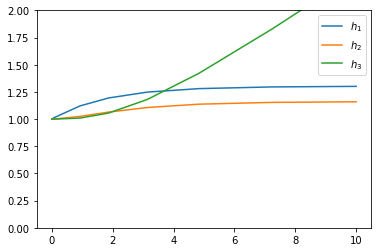

In [32]:
plt.plot(sol.t, h1,
         sol.t, h2, 
         sol.t, h3)
plt.ylim(0, 2)
plt.legend(['$h_1$', '$h_2$', '$h_3$'])

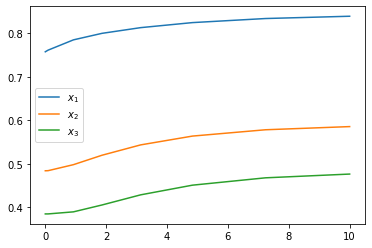

In [33]:
plt.plot(sol.t, x1,
         sol.t, x2, 
         sol.t, x3)
plt.legend(['$x_1$', '$x_2$', '$x_3$'])